Let’s consider a very basic linear equation i.e., y=2x+1. Here, ‘x’ is the independent variable and y is the dependent variable. We’ll use this equation to create a dummy dataset which will be used to train this linear regression model. Following is the code for creating the dataset.

In [8]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

Once we have created the dataset, we can start writing the code for our model. First thing will be to define the model architecture. We do that using the following piece of code.

In [6]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


We defined a class for linear regression, that inherits torch.nn.Module which is the basic Neural Network module containing all the required functions. Our Linear Regression model only contains one simple linear function.

Next, we instantiate the model using the following code.

After that, we initialize the loss (Mean Squared Error) and optimization (Stochastic Gradient Descent) functions that we’ll use in the training of this model.



In [10]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)
##### For GPU #######
if torch.cuda.is_available():
    model.cuda()
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

After completing all the initializations, we can now begin to train our model. Following is the code for training the model.

In [13]:
import matplotlib.pyplot as plt
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(7.6661e-05, grad_fn=<MseLossBackward0>)
epoch 0, loss 7.666120654903352e-05
tensor(7.5805e-05, grad_fn=<MseLossBackward0>)
epoch 1, loss 7.580495002912357e-05
tensor(7.4959e-05, grad_fn=<MseLossBackward0>)
epoch 2, loss 7.495857425965369e-05
tensor(7.4120e-05, grad_fn=<MseLossBackward0>)
epoch 3, loss 7.411999104078859e-05
tensor(7.3293e-05, grad_fn=<MseLossBackward0>)
epoch 4, loss 7.329320214921609e-05
tensor(7.2474e-05, grad_fn=<MseLossBackward0>)
epoch 5, loss 7.247376925079152e-05
tensor(7.1666e-05, grad_fn=<MseLossBackward0>)
epoch 6, loss 7.166604336816818e-05
tensor(7.0867e-05, grad_fn=<MseLossBackward0>)
epoch 7, loss 7.086719415383413e-05
tensor(7.0074e-05, grad_fn=<MseLossBackward0>)
epoch 8, loss 7.007380190771073e-05
tensor(6.9291e-05, grad_fn=<MseLossBackward0>)
epoch 9, loss 6.929115625098348e-05
tensor(6.8519e-05, grad_fn=<MseLossBackward0>)
epoch 10, loss 6.851850776001811e-05
tensor(6.7753e-05, grad_fn=<MseLossBackward0>)
epoch 11, loss 6.775254587410018e-05
te

Now that our Linear Regression Model is trained, let’s test it. Since it’s a very trivial model, we’ll test this on our existing dataset and also plot to see the original vs the predicted outputs.

[[ 1.009342 ]
 [ 3.0079966]
 [ 5.0066514]
 [ 7.0053062]
 [ 9.003961 ]
 [11.002616 ]
 [13.00127  ]
 [14.999926 ]
 [16.998579 ]
 [18.997234 ]
 [20.99589  ]]


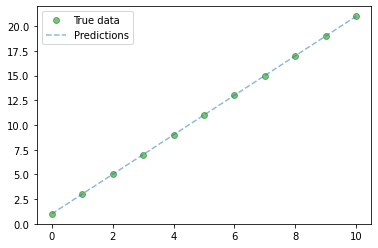

In [14]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()